# Understanding NeuroImaging Data
* From the MRI Scanner, the images are collected in a raw scanner format called as DICOM (Digital Imaging and Communications in Medicine) and needs to be converted to NIfTI(Neuroimaging Informatics Technology Initiative) format to make working with the data easier.
* Nifti Images are identified as `image.nii`.
* MRI data is acquired as 3D or 4D images.
* A 3D image has information encoded in `voxels` (similar to pixels, but cubic).

In [35]:
from nilearn import datasets
from nilearn import image
from nilearn import plotting
from nilearn import masking
from nilearn.input_data import NiftiMasker
from nilearn.signal import clean
import warnings
warnings.simplefilter("ignore")

In [2]:
haxby_dataset = datasets.fetch_haxby(data_dir=None)

In [3]:
datasets.get_data_dirs()

['C:\\Users\\abhay/nilearn_data']

In [4]:
sorted(list(haxby_dataset.keys()))

['anat',
 'description',
 'func',
 'mask',
 'mask_face',
 'mask_face_little',
 'mask_house',
 'mask_house_little',
 'mask_vt',
 'session_target']

In [5]:
haxby_dataset["description"]

'Haxby 2001 results\n\n\nNotes\n-----\nResults from a classical fMRI study that investigated the differences between\nthe neural correlates of face versus object processing in the ventral visual\nstream. Face and object stimuli showed widely distributed and overlapping\nresponse patterns.\n\nContent\n-------\nThe "simple" dataset includes\n    :\'func\': Nifti images with bold data\n    :\'session_target\': Text file containing session data\n    :\'mask\': Nifti images with employed mask\n    :\'session\': Text file with condition labels\n\n\nThe full dataset additionally includes\n    :\'anat\': Nifti images with anatomical image\n    :\'func\': Nifti images with bold data\n    :\'mask_vt\': Nifti images with mask for ventral visual/temporal cortex\n    :\'mask_face\': Nifti images with face-reponsive brain regions\n    :\'mask_house\': Nifti images with house-reponsive brain regions\n    :\'mask_face_little\': Spatially more constrained version of the above\n    :\'mask_house_little\

In [6]:
anatomical = image.load_img(img=haxby_dataset["anat"])
functional = image.load_img(img=haxby_dataset["func"])

In [7]:
print("anatomical shape = ", anatomical.shape)
print("functional shape = ", functional.shape)

anatomical shape =  (124, 256, 256, 1)
functional shape =  (40, 64, 64, 1452)


In [8]:
all_mask_images = image.load_img("/Users/abhay/nilearn_data/haxby2001/subj2/mask*.nii.gz")
print("all mask images shape = ", all_mask_images.shape)

all mask images shape =  (40, 64, 64, 5)


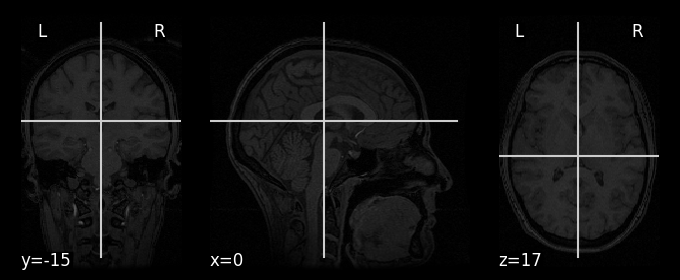

In [9]:
plotting.plot_anat(anatomical)
plotting.show()

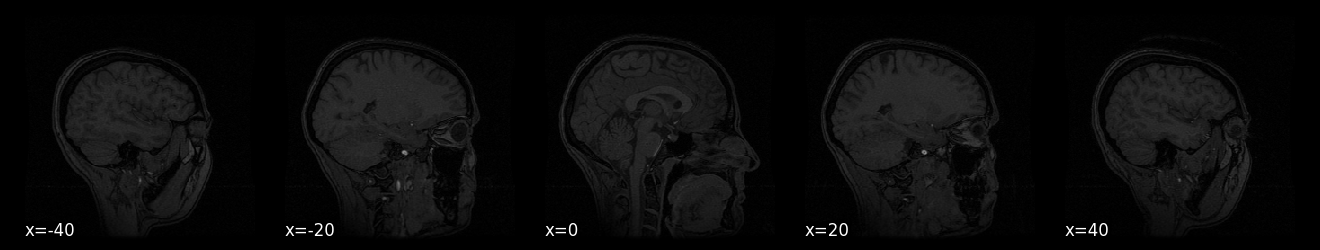

In [13]:
plotting.plot_anat(anatomical, display_mode="x", cut_coords=[-40, -20, 0, 20, 40])

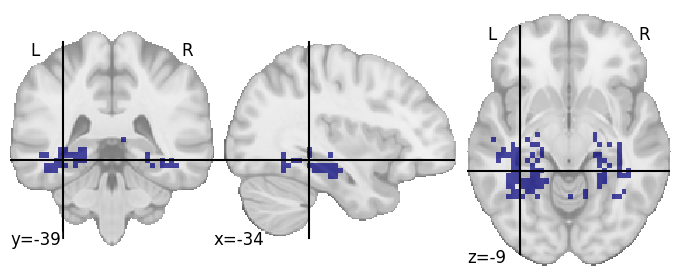

In [14]:
# Specify the mask image input to plot ROI images
plotting.plot_roi(roi_img=haxby_dataset['mask_vt'][0])

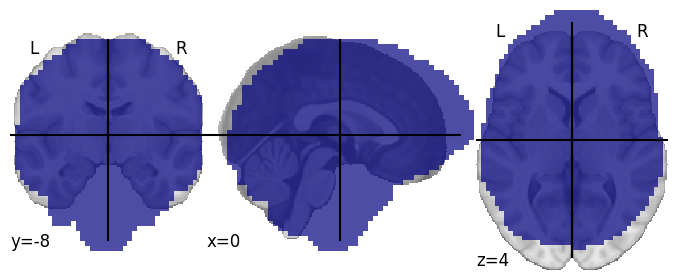

In [15]:
plotting.plot_roi(roi_img=haxby_dataset['mask'])

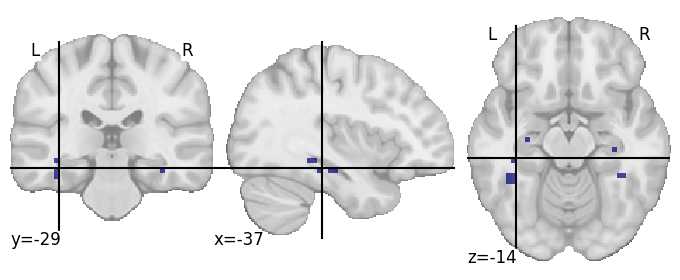

In [16]:
plotting.plot_roi(roi_img=haxby_dataset['mask_face'][0])

In [17]:
mean_functional_image = image.mean_img(imgs=functional)
print("functional shape = ", functional.shape)
print("mean functional image shape = ", mean_functional_image.shape)

functional shape =  (40, 64, 64, 1452)
mean functional image shape =  (40, 64, 64)


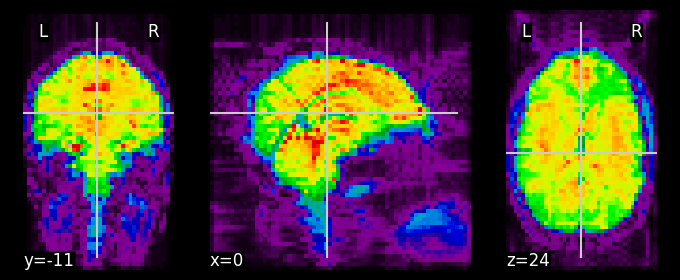

In [18]:
plotting.plot_epi(epi_img=mean_functional_image)
plotting.show()

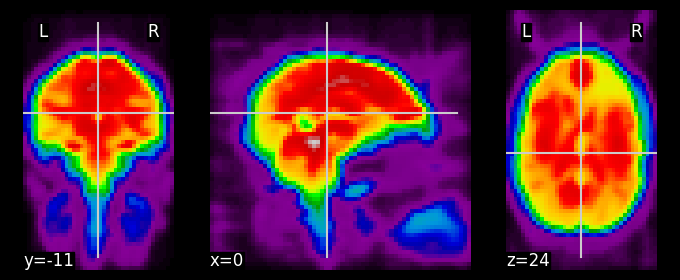

In [19]:
smooth_mean_functional_image = image.smooth_img(imgs=mean_functional_image, fwhm=8)
plotting.plot_epi(epi_img=smooth_mean_functional_image)

In [20]:
log_image = image.math_img("np.log(img)", img=anatomical)

# negate the image
negate_image = image.math_img("-img", img=anatomical)

In [21]:
add_anatomical_img_with_log_img = image.math_img("img1 + img2", img1=log_image, img2=anatomical)

## Compute TSNR

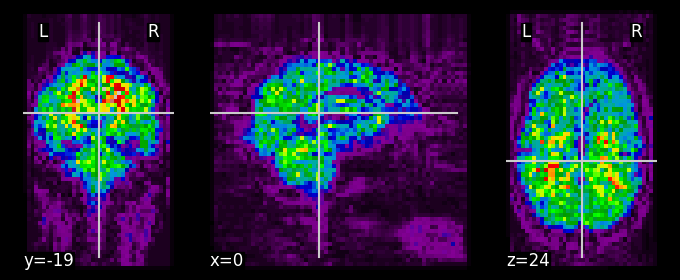

In [22]:
tsnr_functional_image = image.math_img("np.mean(img, axis=3) / np.std(img, axis=3)", img=functional)
plotting.plot_epi(tsnr_functional_image)
plotting.show()

In [25]:
print("anatomical shape = ", anatomical.shape)
print("functional shape = ", functional.shape)

anatomical_img_resampled = image.resample_to_img(source_img=anatomical, target_img=functional)
print("resampled  shape = ", anatomical_img_resampled.shape)

anatomical shape =  (124, 256, 256, 1)
functional shape =  (40, 64, 64, 1452)
resampled  shape =  (40, 64, 64, 1)


## Masking

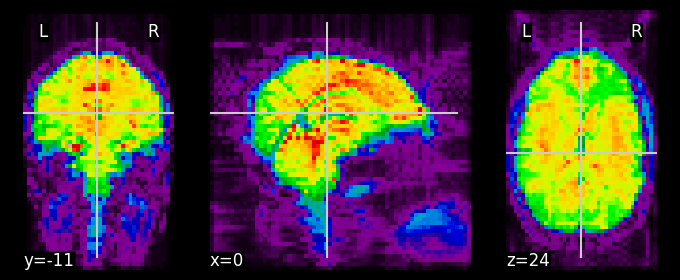

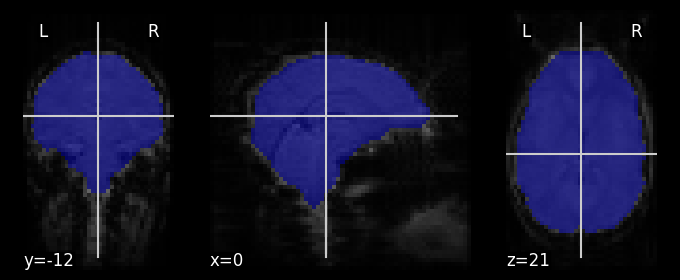

In [28]:
func_mask = masking.compute_epi_mask(mean_functional_image)

# Visualize the mask that is computed on the mean functional image
plotting.plot_epi(mean_functional_image)
plotting.plot_roi(func_mask, mean_functional_image)
plotting.show() 

In [29]:
print("Before masking, our data has shape %s ..." % (functional.shape,))
functional_masked = masking.apply_mask(functional, func_mask)
print("After masking, shape %s and is a %s" % (functional_masked.shape, type(functional_masked).__name__))

Before masking, our data has shape (40, 64, 64, 1452) ...
After masking, shape (1452, 24083) and is a ndarray


In [30]:
# Complete the block with face mask or any other mask by following above demo
mask_img = haxby_dataset['mask_face'][0]
print("Before masking, our data has shape %s ..." % (functional.shape,))
functional_masked_with_face_mask = masking.apply_mask(functional, mask_img)
print("After masking, shape %s and is a %s" % (functional_masked_with_face_mask.shape, type(functional_masked_with_face_mask).__name__))

Before masking, our data has shape (40, 64, 64, 1452) ...
After masking, shape (1452, 30) and is a ndarray


In [32]:
masker = NiftiMasker(mask_img=func_mask, verbose=True)

In [33]:
masked_functional_image = masker.fit_transform(functional)
print(masked_functional_image.shape)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(40, 64, 64, 1452),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [   0.   ,    0.   ,    0.   ,    1.   ]])
)
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
(1452, 24083)


In [34]:
# Implement the smoothing and mask strategy parameter here, inspired by above
masker = NiftiMasker(mask_img=func_mask, mask_strategy='epi',
 smoothing_fwhm=7, verbose=True)
smoothed_masked_functional_image = masker.fit_transform(functional)
print(smoothed_masked_functional_image.shape)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(40, 64, 64, 1452),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [   0.   ,    0.   ,    0.   ,    1.   ]])
)
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
(1452, 24083)
